In [1]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error ,mean_absolute_error,explained_variance_score,mean_squared_log_error,r2_score,f1_score
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

Using TensorFlow backend.
D:\Python\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Python\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Python\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Python\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synon

In [2]:
data = pd.read_csv('../Files tcc/data.csv',index_col=['Data'])
data.head()

,Fechamento
Data,
01-01-2015,314.25
02-01-2015,315.03
03-01-2015,281.08
04-01-2015,264.20
05-01-2015,274.47


(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]),
 <a list of 10 Text xticklabel objects>)

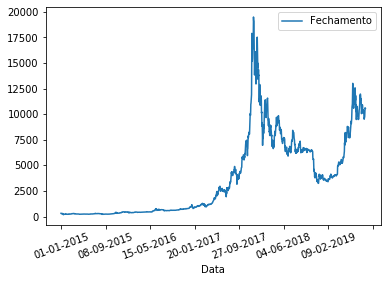

In [19]:
data.plot()
plt.xticks(rotation=20)

In [3]:
df = data[['Fechamento']]
dataset = df.values
dataset = dataset.astype('float32')
dataset

array([[  314.25],
       [  315.03],
       [  281.08],
       ...,
       [10623.54],
       [10594.49],
       [10575.53]], dtype=float32)

In [4]:
train_size = int(len(dataset)*0.67)
teste_size = len(dataset) - train_size
train,test = dataset[0:train_size,:],dataset[train_size:len(dataset),:]
print(len(train), len(test))
train

1145 564


array([[  314.25],
       [  315.03],
       [  281.08],
       ...,
       [10233.9 ],
       [11112.7 ],
       [10551.8 ]], dtype=float32)

In [5]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY) 

In [6]:
def antes(dataset,look_back=1):
    dia_atras = []
    for i in range(len(dataset)-look_back-1):
        dia_atras.append(dataset[i-1+look_back, 0])
    
    return np.array(dia_atras)

In [7]:
look_back=3
trainX, trainY = create_dataset(train, look_back=look_back)
testX, testY = create_dataset(test,look_back=look_back)
dia_atras = antes(test,look_back=look_back)
print(len(trainX),len(trainY),len(testX),len(testY),len(dia_atras))

1141 1141 560 560 560


In [8]:
NN_model = Sequential()

# ENTRADA :
NN_model.add(Dense(140, kernel_initializer='normal',input_dim = trainX.shape[1], activation='relu'))

# CAMADA OCULTA :
NN_model.add(Dense(280, kernel_initializer='normal',activation='selu'))
NN_model.add(Dense(280, kernel_initializer='normal',activation='selu'))
NN_model.add(Dense(280, kernel_initializer='normal',activation='selu'))

# SAIDA :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 140)               560       
_________________________________________________________________
dense_2 (Dense)              (None, 280)               39480     
_________________________________________________________________
dense_3 (Dense)              (None, 280)               78680     
_________________________________________________________________
dense_4 (Dense)              (None, 280)               78680     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 281       
Total params: 197,681
Trainable params: 197,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
checkpoint = ModelCheckpoint('DNN', monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [10]:
NN_model.fit(trainX, trainY, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Train on 912 samples, validate on 229 samples
Epoch 1/500
912/912 [==============================] - 1s 601us/step - loss: 207.6081 - mean_absolute_error: 207.6081 - val_loss: 1528.7549 - val_mean_absolute_error: 1528.7548

Epoch 00001: val_loss improved from inf to 1528.75489, saving model to DNN
Epoch 2/500
912/912 [==============================] - 0s 296us/step - loss: 45.3744 - mean_absolute_error: 45.3744 - val_loss: 897.5921 - val_mean_absolute_error: 897.5921

Epoch 00002: val_loss improved from 1528.75489 to 897.59207, saving model to DNN
Epoch 3/500
912/912 [==============================] - 0s 302us/step - loss: 24.7846 - mean_absolute_error: 24.7846 - val_loss: 482.4726 - val_mean_absolute_error: 482.4726

Epoch 00003: val_loss improved from 897.59207 to 482.47261, saving model to DNN
Epoch 4/500
912/912 [==============================] - 0s 292us/step - loss: 22.6893 - mean_absolute_error: 22.6893 - val_loss: 465.7330 - val_mean_absolute_error: 465.7330

Epoch 00004: val_

912/912 [==============================] - 0s 271us/step - loss: 18.2804 - mean_absolute_error: 18.2804 - val_loss: 445.2663 - val_mean_absolute_error: 445.2664

Epoch 00069: val_loss did not improve from 372.54476
Epoch 70/500
912/912 [==============================] - 0s 276us/step - loss: 17.2696 - mean_absolute_error: 17.2696 - val_loss: 373.3056 - val_mean_absolute_error: 373.3056

Epoch 00070: val_loss did not improve from 372.54476
Epoch 71/500
912/912 [==============================] - 0s 265us/step - loss: 18.5728 - mean_absolute_error: 18.5728 - val_loss: 402.4200 - val_mean_absolute_error: 402.4200

Epoch 00071: val_loss did not improve from 372.54476
Epoch 72/500
912/912 [==============================] - 0s 274us/step - loss: 16.5000 - mean_absolute_error: 16.5000 - val_loss: 377.1149 - val_mean_absolute_error: 377.1149

Epoch 00072: val_loss did not improve from 372.54476
Epoch 73/500
912/912 [==============================] - 0s 267us/step - loss: 19.3694 - mean_absolute


Epoch 00104: val_loss did not improve from 372.54476
Epoch 105/500
912/912 [==============================] - 0s 271us/step - loss: 17.8578 - mean_absolute_error: 17.8578 - val_loss: 385.2245 - val_mean_absolute_error: 385.2245

Epoch 00105: val_loss did not improve from 372.54476
Epoch 106/500
912/912 [==============================] - 0s 265us/step - loss: 16.8195 - mean_absolute_error: 16.8195 - val_loss: 375.1850 - val_mean_absolute_error: 375.1851

Epoch 00106: val_loss did not improve from 372.54476
Epoch 107/500
912/912 [==============================] - 0s 271us/step - loss: 15.9494 - mean_absolute_error: 15.9494 - val_loss: 380.1545 - val_mean_absolute_error: 380.1545

Epoch 00107: val_loss did not improve from 372.54476
Epoch 108/500
912/912 [==============================] - 0s 286us/step - loss: 15.3029 - mean_absolute_error: 15.3029 - val_loss: 398.9947 - val_mean_absolute_error: 398.9948

Epoch 00108: val_loss did not improve from 372.54476
Epoch 109/500
912/912 [=======


Epoch 00140: val_loss did not improve from 372.54476
Epoch 141/500
912/912 [==============================] - 0s 267us/step - loss: 21.7608 - mean_absolute_error: 21.7608 - val_loss: 482.4335 - val_mean_absolute_error: 482.4335

Epoch 00141: val_loss did not improve from 372.54476
Epoch 142/500
912/912 [==============================] - 0s 274us/step - loss: 20.3590 - mean_absolute_error: 20.3590 - val_loss: 400.0522 - val_mean_absolute_error: 400.0522

Epoch 00142: val_loss did not improve from 372.54476
Epoch 143/500
912/912 [==============================] - 0s 266us/step - loss: 20.8851 - mean_absolute_error: 20.8851 - val_loss: 440.5745 - val_mean_absolute_error: 440.5746

Epoch 00143: val_loss did not improve from 372.54476
Epoch 144/500
912/912 [==============================] - 0s 264us/step - loss: 17.8461 - mean_absolute_error: 17.8461 - val_loss: 373.2424 - val_mean_absolute_error: 373.2424

Epoch 00144: val_loss did not improve from 372.54476
Epoch 145/500
912/912 [=======


Epoch 00211: val_loss did not improve from 371.22683
Epoch 212/500
912/912 [==============================] - 0s 290us/step - loss: 21.6346 - mean_absolute_error: 21.6346 - val_loss: 387.4909 - val_mean_absolute_error: 387.4908

Epoch 00212: val_loss did not improve from 371.22683
Epoch 213/500
912/912 [==============================] - 0s 318us/step - loss: 17.3530 - mean_absolute_error: 17.3530 - val_loss: 415.3197 - val_mean_absolute_error: 415.3197

Epoch 00213: val_loss did not improve from 371.22683
Epoch 214/500
912/912 [==============================] - 0s 320us/step - loss: 19.9739 - mean_absolute_error: 19.9739 - val_loss: 415.5419 - val_mean_absolute_error: 415.5420

Epoch 00214: val_loss did not improve from 371.22683
Epoch 215/500
912/912 [==============================] - 0s 328us/step - loss: 15.9349 - mean_absolute_error: 15.9349 - val_loss: 372.3785 - val_mean_absolute_error: 372.3785

Epoch 00215: val_loss did not improve from 371.22683
Epoch 216/500
912/912 [=======


Epoch 00247: val_loss did not improve from 371.22683
Epoch 248/500
912/912 [==============================] - 0s 270us/step - loss: 17.0172 - mean_absolute_error: 17.0172 - val_loss: 423.4228 - val_mean_absolute_error: 423.4229

Epoch 00248: val_loss did not improve from 371.22683
Epoch 249/500
912/912 [==============================] - 0s 278us/step - loss: 16.9695 - mean_absolute_error: 16.9695 - val_loss: 385.9591 - val_mean_absolute_error: 385.9591

Epoch 00249: val_loss did not improve from 371.22683
Epoch 250/500
912/912 [==============================] - 0s 267us/step - loss: 15.4635 - mean_absolute_error: 15.4635 - val_loss: 373.3537 - val_mean_absolute_error: 373.3537

Epoch 00250: val_loss did not improve from 371.22683
Epoch 251/500
912/912 [==============================] - 0s 272us/step - loss: 18.7196 - mean_absolute_error: 18.7196 - val_loss: 386.7508 - val_mean_absolute_error: 386.7508

Epoch 00251: val_loss did not improve from 371.22683
Epoch 252/500
912/912 [=======


Epoch 00283: val_loss did not improve from 371.22683
Epoch 284/500
912/912 [==============================] - 0s 277us/step - loss: 17.6773 - mean_absolute_error: 17.6773 - val_loss: 380.7934 - val_mean_absolute_error: 380.7934

Epoch 00284: val_loss did not improve from 371.22683
Epoch 285/500
912/912 [==============================] - 0s 269us/step - loss: 21.7408 - mean_absolute_error: 21.7408 - val_loss: 381.2647 - val_mean_absolute_error: 381.2647

Epoch 00285: val_loss did not improve from 371.22683
Epoch 286/500
912/912 [==============================] - 0s 279us/step - loss: 18.1240 - mean_absolute_error: 18.1240 - val_loss: 378.3726 - val_mean_absolute_error: 378.3726

Epoch 00286: val_loss did not improve from 371.22683
Epoch 287/500
912/912 [==============================] - 0s 267us/step - loss: 17.5091 - mean_absolute_error: 17.5091 - val_loss: 408.1583 - val_mean_absolute_error: 408.1583

Epoch 00287: val_loss did not improve from 371.22683
Epoch 288/500
912/912 [=======

912/912 [==============================] - 0s 271us/step - loss: 16.0855 - mean_absolute_error: 16.0855 - val_loss: 373.1532 - val_mean_absolute_error: 373.1532

Epoch 00355: val_loss did not improve from 370.36471
Epoch 356/500
912/912 [==============================] - 0s 273us/step - loss: 15.8378 - mean_absolute_error: 15.8378 - val_loss: 372.1270 - val_mean_absolute_error: 372.1270

Epoch 00356: val_loss did not improve from 370.36471
Epoch 357/500
912/912 [==============================] - 0s 271us/step - loss: 15.4016 - mean_absolute_error: 15.4016 - val_loss: 380.4541 - val_mean_absolute_error: 380.4542

Epoch 00357: val_loss did not improve from 370.36471
Epoch 358/500
912/912 [==============================] - 0s 270us/step - loss: 16.7706 - mean_absolute_error: 16.7706 - val_loss: 383.4619 - val_mean_absolute_error: 383.4619

Epoch 00358: val_loss did not improve from 370.36471
Epoch 359/500
912/912 [==============================] - 0s 265us/step - loss: 15.4343 - mean_abso

912/912 [==============================] - 0s 314us/step - loss: 16.4163 - mean_absolute_error: 16.4163 - val_loss: 421.9614 - val_mean_absolute_error: 421.9614

Epoch 00391: val_loss did not improve from 370.36471
Epoch 392/500
912/912 [==============================] - 0s 321us/step - loss: 15.9333 - mean_absolute_error: 15.9333 - val_loss: 447.2748 - val_mean_absolute_error: 447.2747

Epoch 00392: val_loss did not improve from 370.36471
Epoch 393/500
912/912 [==============================] - 0s 323us/step - loss: 19.4455 - mean_absolute_error: 19.4455 - val_loss: 395.5838 - val_mean_absolute_error: 395.5839

Epoch 00393: val_loss did not improve from 370.36471
Epoch 394/500
912/912 [==============================] - 0s 318us/step - loss: 15.7157 - mean_absolute_error: 15.7157 - val_loss: 373.7050 - val_mean_absolute_error: 373.7050

Epoch 00394: val_loss did not improve from 370.36471
Epoch 395/500
912/912 [==============================] - 0s 326us/step - loss: 15.0836 - mean_abso

912/912 [==============================] - 0s 272us/step - loss: 15.8978 - mean_absolute_error: 15.8978 - val_loss: 411.5492 - val_mean_absolute_error: 411.5492

Epoch 00427: val_loss did not improve from 370.36471
Epoch 428/500
912/912 [==============================] - 0s 262us/step - loss: 15.9385 - mean_absolute_error: 15.9385 - val_loss: 411.2567 - val_mean_absolute_error: 411.2567

Epoch 00428: val_loss did not improve from 370.36471
Epoch 429/500
912/912 [==============================] - 0s 273us/step - loss: 22.1985 - mean_absolute_error: 22.1985 - val_loss: 417.0673 - val_mean_absolute_error: 417.0673

Epoch 00429: val_loss did not improve from 370.36471
Epoch 430/500
912/912 [==============================] - 0s 268us/step - loss: 17.3508 - mean_absolute_error: 17.3508 - val_loss: 382.9230 - val_mean_absolute_error: 382.9230

Epoch 00430: val_loss did not improve from 370.36471
Epoch 431/500
912/912 [==============================] - 0s 276us/step - loss: 16.2617 - mean_abso

912/912 [==============================] - 0s 270us/step - loss: 17.4179 - mean_absolute_error: 17.4179 - val_loss: 372.6794 - val_mean_absolute_error: 372.6794

Epoch 00463: val_loss did not improve from 370.36471
Epoch 464/500
912/912 [==============================] - 0s 266us/step - loss: 15.9810 - mean_absolute_error: 15.9810 - val_loss: 400.3451 - val_mean_absolute_error: 400.3451

Epoch 00464: val_loss did not improve from 370.36471
Epoch 465/500
912/912 [==============================] - 0s 278us/step - loss: 16.1362 - mean_absolute_error: 16.1362 - val_loss: 412.3501 - val_mean_absolute_error: 412.3501

Epoch 00465: val_loss did not improve from 370.36471
Epoch 466/500
912/912 [==============================] - 0s 266us/step - loss: 15.8970 - mean_absolute_error: 15.8970 - val_loss: 409.8622 - val_mean_absolute_error: 409.8622

Epoch 00466: val_loss did not improve from 370.36471
Epoch 467/500
912/912 [==============================] - 0s 266us/step - loss: 17.6573 - mean_abso

912/912 [==============================] - 0s 269us/step - loss: 19.6977 - mean_absolute_error: 19.6977 - val_loss: 380.2891 - val_mean_absolute_error: 380.2891

Epoch 00499: val_loss did not improve from 370.36471
Epoch 500/500
912/912 [==============================] - 0s 286us/step - loss: 15.9194 - mean_absolute_error: 15.9194 - val_loss: 382.5516 - val_mean_absolute_error: 382.5516

Epoch 00500: val_loss did not improve from 370.36471


In [11]:
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [12]:
predicoes = NN_model.predict(testX)
testY = testY.reshape(560,1)

In [13]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [14]:
erroEmPorcento = mean_absolute_percentage_error(testY,predicoes)
print(100-erroEmPorcento)
erroEmPorcento

96.90129477530718


3.0987052246928215

In [15]:
resultado = pd.DataFrame(testY,columns=['Esperado'])
resultado['Predito'] = predicoes
resultado.index = data.tail(560).index

DNN
MAPE: 96.901
Desvio: -3.099
MSE: 109995.469
RMSE: 331.656
MAE: 222.061
MSLE: 0.002
R2 score: 98.024
Explaine Variance Score: 98.319


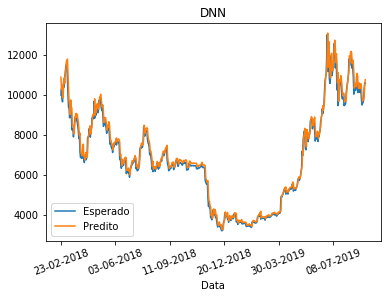

In [16]:
print('DNN')
print("MAPE: %.3f"%(100-mean_absolute_percentage_error(testY,predicoes)))
print("Desvio: %.3f"%-mean_absolute_percentage_error(testY,predicoes))
print("MSE: %.3f"%mean_squared_error(testY,predicoes))
print("RMSE: %.3f"%sqrt(mean_squared_error(testY,predicoes)))
print("MAE: %.3f"%mean_absolute_error(testY,predicoes))
print("MSLE: %.3f"%mean_squared_log_error(testY,predicoes))
print("R2 score: %.3f"%(r2_score(testY,predicoes)*100))
print("Explaine Variance Score: %.3f"%(explained_variance_score(testY,predicoes)*100))
resultado.plot()
plt.xticks(rotation=20)
plt.title('DNN')
plt.savefig('DNN_teste.png')    

Predição de um dia em especifico
MAPE: 96.191
Desvio: 3.809
RMSE: 282.771
Fechamento [7424.29]
Predito [[7707.061]]


Text(0.5, 1.0, 'Comparação do FechamentoXPredição')

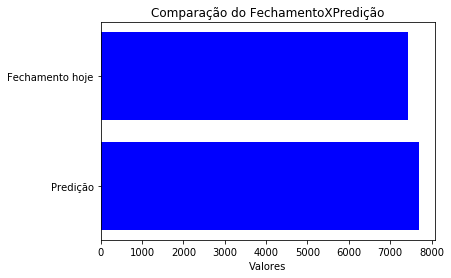

In [21]:
entrada = np.array([[7463.11,7761.24,7569.63]])
fechamentohoje = [7424.29]
predicaohoje = NN_model.predict(entrada)
print("Predição de um dia em especifico")
print("MAPE: %.3f"%(100-mean_absolute_percentage_error(fechamentohoje,predicaohoje)))
print("Desvio: %.3f"%mean_absolute_percentage_error(fechamentohoje,predicaohoje))
print("RMSE: %.3f"%sqrt(mean_squared_error(fechamentohoje,predicaohoje)))
print("Fechamento %s"%fechamentohoje)
print("Predito %s"%predicaohoje)

vetorgrafico = { "Predição": predicaohoje[0] , "Fechamento hoje": fechamentohoje[0]}
colunas = [i for i in vetorgrafico.keys()]
valor = [j for j in vetorgrafico.values()]
popPos = np.arange(len(colunas))
plt.barh(popPos, valor, align='center', color='blue')
plt.yticks(popPos, colunas)
plt.xlabel('Valores')
plt.title('Comparação do FechamentoXPredição')